In [268]:
import pandas as pd

# 1. Read the HTML table from the file and convert to CSV
tables = pd.read_html('../data/awplr.xls')
df = tables[0]

# 3. Use row 5 (the 6th row) as the header
df.columns = df.iloc[5].values  # .values ensures we take only the row’s data
df.columns.name = None          # remove the “5” name that sometimes appears

# 4. Keep rows after row 5 as the data
df = df.iloc[6:].reset_index(drop=True)

# 5. Extract only the desired columns (adjust names if they differ)
df_extracted = df[['End Week', 'Weekly']]

# 6. Remove any index name (just to be sure)
df_extracted.index.name = None

# 7. Print a clean table in the console without row indices
print("Extracted Data:")
print(df_extracted.shape)
print(df_extracted)

Extracted Data:
(1009, 2)
        End Week Weekly
0     2025-02-28   8.36
1     2025-02-21   8.39
2     2025-02-14   8.42
3     2025-02-07   8.59
4     2025-01-31   8.56
...          ...    ...
1004  2008-01-31    NaN
1005  2008-01-25  17.83
1006  2008-01-18  17.49
1007  2008-01-11  17.19
1008  2008-01-04  19.33

[1009 rows x 2 columns]


In [270]:
print(df_extracted.dtypes)


End Week    object
Weekly      object
dtype: object


In [272]:
# Convert 'End Week Weekly' to datetime
df_extracted["End Week"] = pd.to_datetime(df_extracted["End Week"])

# Find NaN row
nan_row = df_extracted[df_extracted["Weekly"].isna()]

# Loop through each NaN row and check if the date is a Friday
for _, row in nan_row.iterrows():
    date_of_nan = row["End Week"]
    is_friday = date_of_nan.weekday() == 4  # 4 represents Friday
    if is_friday:
        print(f"Date {date_of_nan.date()} is a Friday: {is_friday}")

# If no NaN values are found
if nan_row.empty:
    print("No NaN values found.")

/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_89180/2910981868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted["End Week"] = pd.to_datetime(df_extracted["End Week"])


In [274]:
df_cleaned = df_extracted.dropna()
print(df_cleaned)

       End Week Weekly
0    2025-02-28   8.36
1    2025-02-21   8.39
2    2025-02-14   8.42
3    2025-02-07   8.59
4    2025-01-31   8.56
...         ...    ...
1003 2008-02-01  19.42
1005 2008-01-25  17.83
1006 2008-01-18  17.49
1007 2008-01-11  17.19
1008 2008-01-04  19.33

[896 rows x 2 columns]


In [276]:
df_cleaned.rename(columns={"Weekly": "value"}, inplace=True)
df_cleaned.rename(columns={"End Week": "Date"}, inplace=True)



# Convert "weekly AWLPR value" to float
df_cleaned["value"] = pd.to_numeric(df_cleaned["value"], errors="coerce")

# Print data types to verify
print(df_cleaned.dtypes)

Date     datetime64[ns]
value           float64
dtype: object


/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_89180/1475500929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={"Weekly": "value"}, inplace=True)
/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_89180/1475500929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={"End Week": "Date"}, inplace=True)
/var/folders/c4/lp7tf77d1j5_vh5zsl8h57_h0000gn/T/ipykernel_89180/1475500929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

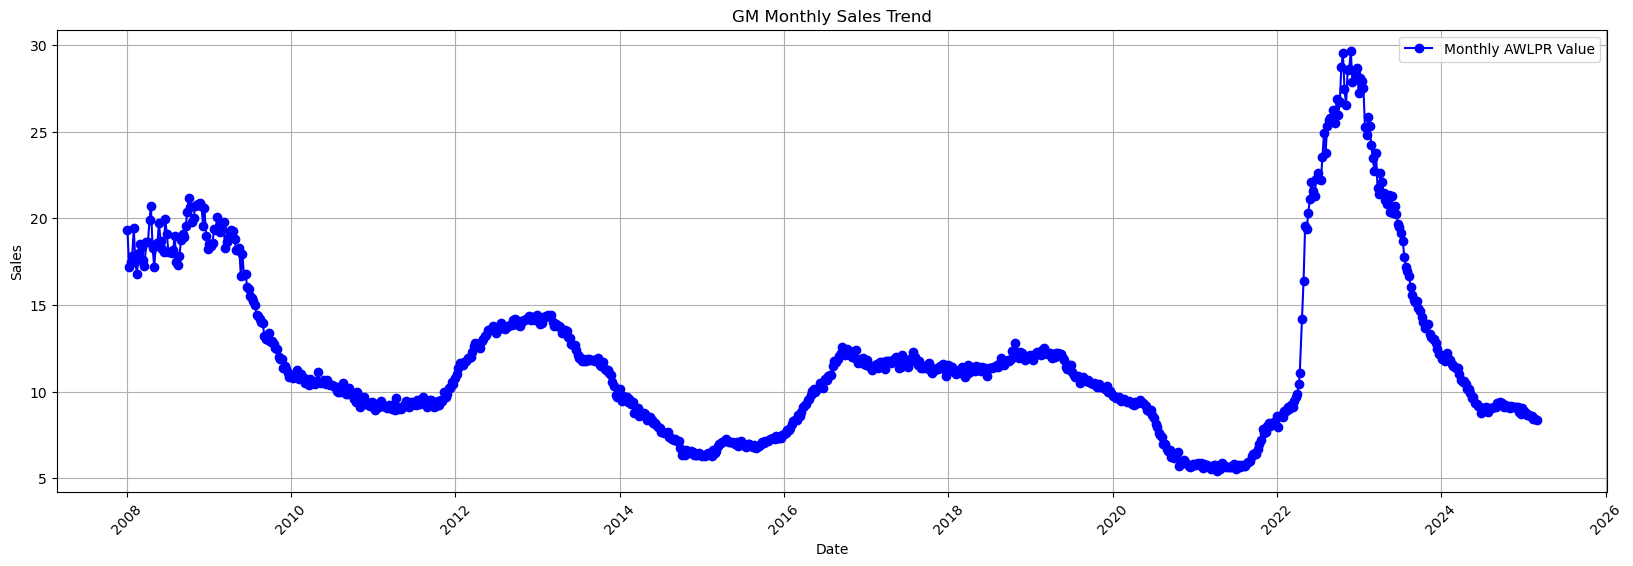

In [284]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the sales trend over time
plt.figure(figsize=(20, 6))
plt.plot(df_cleaned["Date"], df_cleaned["value"], marker='o', linestyle='-', color='b', label="Monthly AWLPR Value")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("GM Monthly Sales Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid()

# Show the plot
plt.show()